<a href="https://colab.research.google.com/github/Ashish-Sinha07/Image-Classification/blob/main/Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from sklearn.metrics import classification_report,confusion_matrix

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Lets get the data
(x_train,y_train),(x_test,y_test) = fashion_mnist.load_data()

In [ ]:
# Lets check the shape
print(x_train.shape)
print(y_train.shape)

(60000, 28, 28)
(60000,)


In [ ]:
print(x_test.shape)
print(y_test.shape)

(10000, 28, 28)
(10000,)


In [ ]:
pd.Series(y_train).unique()

array([9, 0, 3, 2, 7, 5, 1, 6, 4, 8], dtype=uint8)

In [ ]:
label_names = ['T-Shirt/Top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneakers','Bag','Angle Boot']

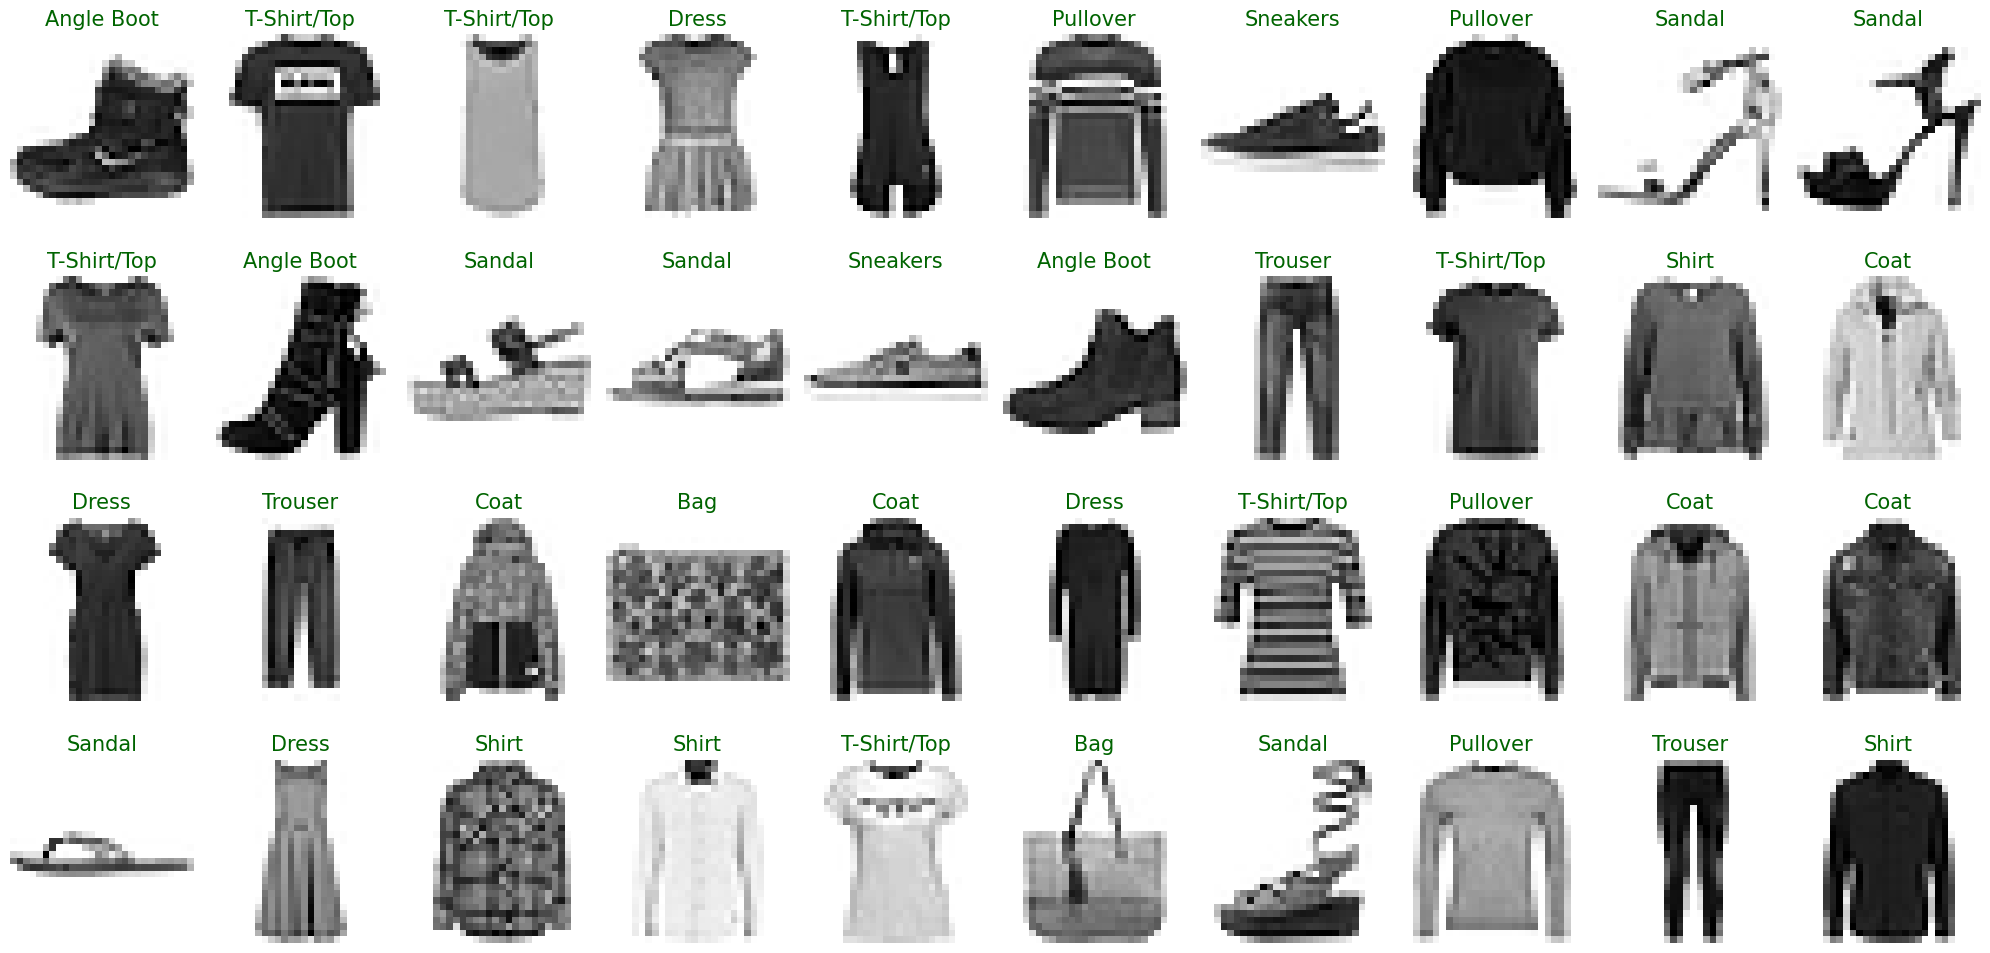

In [ ]:
# Lets see the images
nrows = 4
ncols = 10
t=1
plt.figure(figsize=(20,10))
for i in range(nrows*ncols):
  plt.subplot(nrows,ncols,t)
  plt.imshow(x_train[i],cmap='binary')
  plt.title(f'{label_names[y_train[i]]}',color='darkgreen',fontsize=15)
  plt.axis('off')
  t+=1
plt.tight_layout()
plt.show()

## Data Preprocessing

In [ ]:
# First lets Scale the data (between 0 and 1)
x_train_s =x_train/255
x_test_s = x_test/255

In [ ]:
x_train.max(),x_train.min()

(np.uint8(255), np.uint8(0))

In [ ]:
x_train_s.max(),x_train_s.min()

(np.float64(1.0), np.float64(0.0))

In [ ]:
# Reshape the data from 3D to 2D
# 60000 X 28 X 28 ---> 60000 X 784 (train)
# 10000 X 28 X 28 ---> 10000 X 784
x_train_s = x_train_s.reshape(60000,28*28)
x_test_s = x_test_s.reshape(10000,28*28)

In [ ]:
x_train_s.shape,x_test_s.shape

((60000, 784), (10000, 784))

In [ ]:
pd.DataFrame(x_train_s)

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.003922,0.0,0.0,0.000000,0.000000,...,0.466667,0.447059,0.509804,0.298039,0.0,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.086275,...,0.000000,0.000000,0.003922,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.129412,0.376471,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
59996,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
59997,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.019608,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
59998,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.258824,0.211765,0.196078,0.019608,0.0,0.003922,0.0,0.0,0.0,0.0


## Neural Network

In [ ]:
model = Sequential()

model.add(Dense(1000,input_shape=(784,),activation='relu'))
model.add(Dense(700,activation='relu'))
model.add(Dense(500,activation='relu'))
model.add(Dense(100,activation='relu'))

model.add(Dense(10,activation='softmax'))

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 1000)           │       785,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 700)            │       700,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 500)            │       350,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 100)            │        50,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,887,310 (7.20 MB)

 Trainable params: 1,887,310 (7.20 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(x_train_s,y_train,epochs=20,batch_size=10000)

Epoch 1/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 14s 2s/step - accuracy: 0.3342 - loss: 1.8649
Epoch 2/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 19s 2s/step - accuracy: 0.6818 - loss: 0.8970
Epoch 3/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.7443 - loss: 0.6755
Epoch 4/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 22s 2s/step - accuracy: 0.7853 - loss: 0.5729
Epoch 5/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 19s 2s/step - accuracy: 0.8155 - loss: 0.5136
Epoch 6/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 13s 2s/step - accuracy: 0.8317 - loss: 0.4787
Epoch 7/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 17s 3s/step - accuracy: 0.8460 - loss: 0.4394
Epoch 8/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 15s 2s/step - accuracy: 0.8531 - loss: 0.4157
Epoch 9/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 0.8590 - loss: 0.3932
Epoch 10/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - accuracy: 0.8665 - loss: 0.3725
Epoch 11/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.8664 - loss: 0.3730
Epoch 12/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 0.8672 - loss: 0.3680
Epoch 13/20
6

In [ ]:
# Lets check accuracy on test data
model.evaluate(x_test_s,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.8813 - loss: 0.3339


[0.33598387241363525, 0.8812999725341797]

In [ ]:
# Take the predictions
y_pred = model.predict(x_test_s)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step


In [ ]:
ypred_label = np.argmax(y_pred,axis=1)

In [ ]:
ypred_label

array([9, 2, 1, ..., 8, 1, 5])

In [ ]:
print('Classification Report',classification_report(y_test,ypred_label))

Classification Report               precision    recall  f1-score   support

           0       0.84      0.83      0.84      1000
           1       0.99      0.97      0.98      1000
           2       0.79      0.79      0.79      1000
           3       0.89      0.87      0.88      1000
           4       0.76      0.85      0.80      1000
           5       0.97      0.96      0.96      1000
           6       0.72      0.65      0.69      1000
           7       0.94      0.95      0.95      1000
           8       0.96      0.98      0.97      1000
           9       0.96      0.96      0.96      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



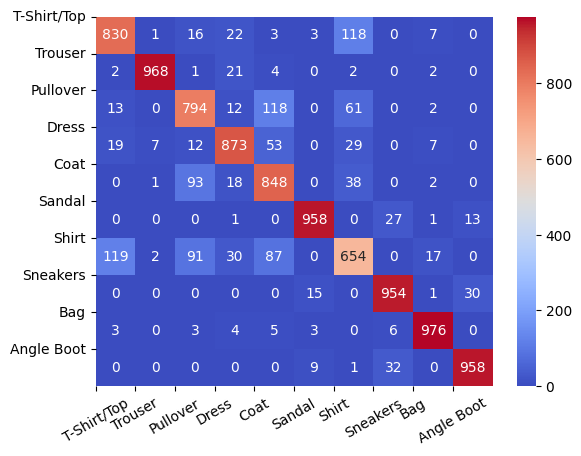

In [ ]:
sns.heatmap(confusion_matrix(y_test,ypred_label),annot=True,cmap='coolwarm',fmt='d')

plt.xticks(range(10),label_names,rotation=30)
plt.yticks(range(10),label_names,rotation='horizontal')
plt.show()

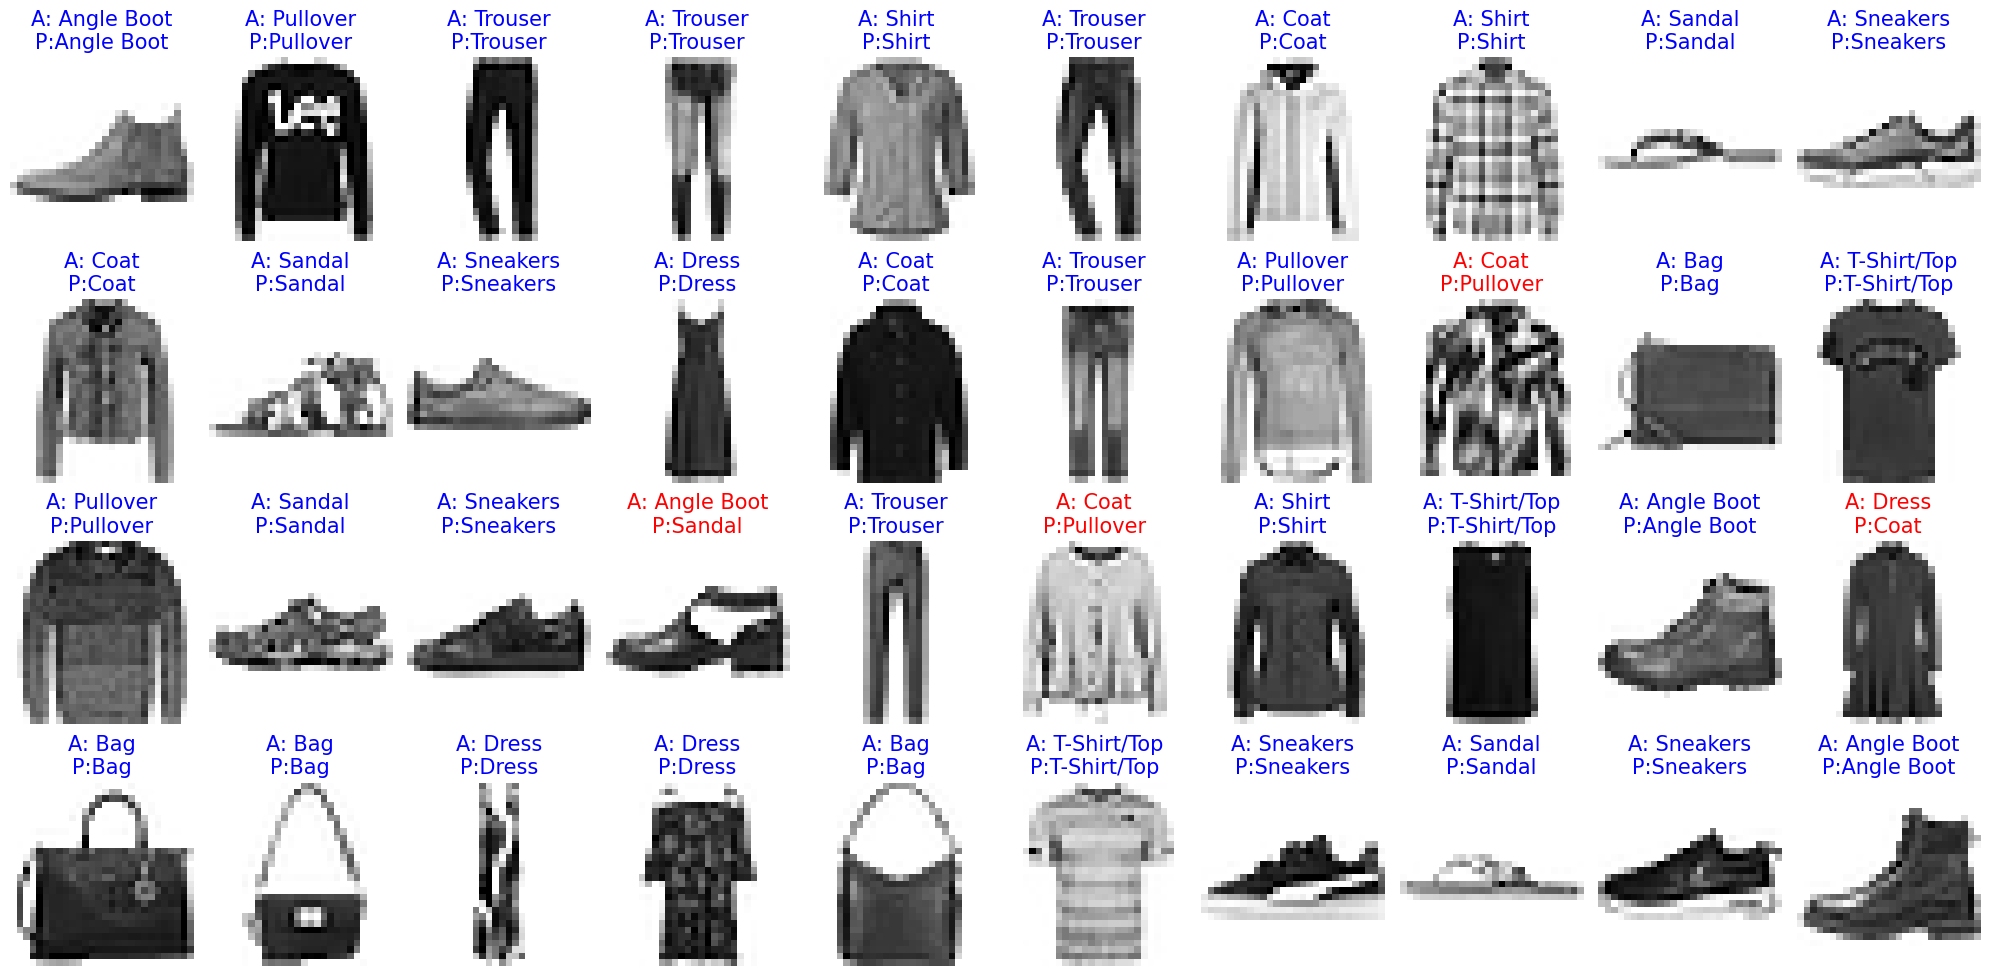

In [ ]:
# Lets see the images
# Actual Labels
nrows = 4
ncols = 10
t=1
plt.figure(figsize=(20,10))
for i in range(nrows*ncols):
  plt.subplot(nrows,ncols,t)
  plt.imshow(x_test[i],cmap='binary')
  color = 'red' if y_test[i]!=ypred_label[i] else 'blue'
  plt.title(f'A: {label_names[y_test[i]]}\nP:{label_names[ypred_label[i]]}',color=color,fontsize=15)
  plt.axis('off')
  t+=1
plt.tight_layout()
plt.show()